This is the HW1 of the subject.

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rand

In [193]:
i = 0
for i in range(5):
    print(i)

0
1
2
3
4


In [194]:
global orange 
global blue
global N

N = 100 # Number of initial points
sz = 10

orange = [] 
blue = []

w1 = 0.3
w2 = round(1.0 - w1, 2)
w3 = 0.8
w4 = round(1.0 - w3, 2)

classes = 2

w = [w1, w2, w3, w4]
pho = [1, 1, -3, 2]

def plot(x, y, col):
    global s
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Gaussian distribution")
    plt.scatter(x, y, color = col, s = sz)
    plt.show()

def f(w, pho, str):
    f = []
    if str == 'orange':
        index = [0, 1]
    elif str == 'blue':
        index = [2, 3]        
    f.append(w[index[0]] * rand.gauss(pho[index[0]], 1))
    f.append(w[index[1]] * rand.gauss(pho[index[1]], 1))
    return f

variance_mat = np.identity(2)
j = 2


After having defined the main variables and functions, the main program will be coded.

In [195]:
for h in range(0,3):
    print(h)

def main():
    global blue
    global orange
    orange = []
    blue = [] 
    for i in range(int(N/classes)):
        orange.append(f(w, pho, 'orange'))
        blue.append(f(w, pho, 'blue'))
    orange = pd.DataFrame(orange)
    blue = pd.DataFrame(blue)    

main()

0
1
2


Once having sampled the Gaussian distribution and having obtained the statistical data, we will perform some Data Exploration for making sure the created data samples are right.

In [196]:
print("ORANGE CLASS DATAFAME EXPLORATION \n")
orange.describe()

ORANGE CLASS DATAFAME EXPLORATION 



,0,1
count,50.000000,50.000000
mean,0.308662,0.625772
std,0.305416,0.746707
min,-0.310379,-0.745097
25%,0.136658,0.055545
50%,0.273590,0.700824
75%,0.509989,1.102245
max,1.173156,2.506242


In [197]:
print("BLUE CLASS DATAFAME EXPLORATION \n")
blue.describe()

BLUE CLASS DATAFAME EXPLORATION 



,0,1
count,50.000000,50.000000
mean,-2.531411,0.421061
std,0.800317,0.181135
min,-3.873551,-0.153222
25%,-3.229458,0.318755
50%,-2.541578,0.415337
75%,-1.959098,0.548028
max,-0.657132,0.735772


After the basic data exploration, we have verified that the mean of the sampled data is the same as we expected (0.3, 0.7, 0.8 * -3 = -2.4, 0.2 * 2).
Now, we will proceed to plot the data into a 2-D map. First of all, each class individually. Then, both of them in the same 2-D plot.

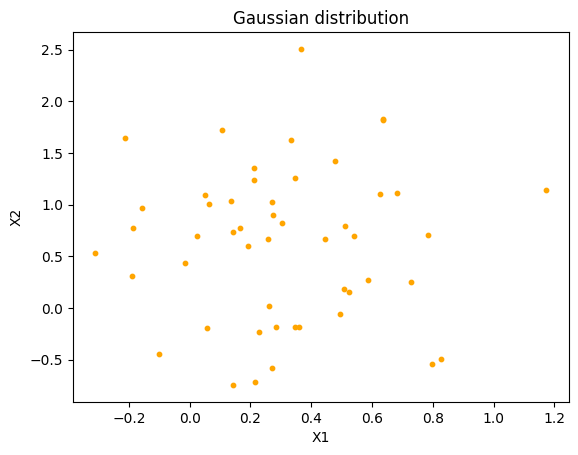

In [198]:
plot(orange.loc[:, 0], orange.loc[:, 1], 'orange')

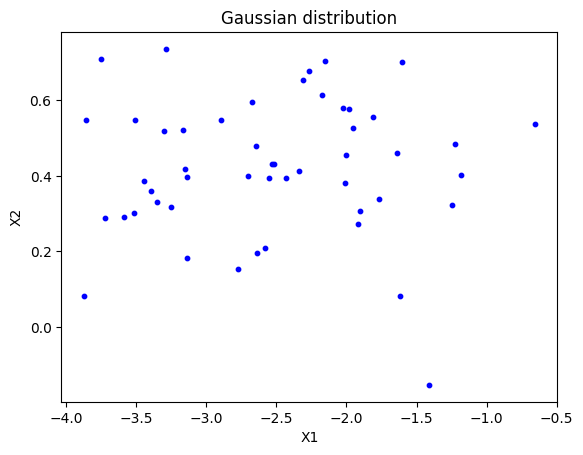

In [199]:
plot(blue.loc[:, 0], blue.loc[:, 1], 'blue')

Now, we will plot both distributions at once.

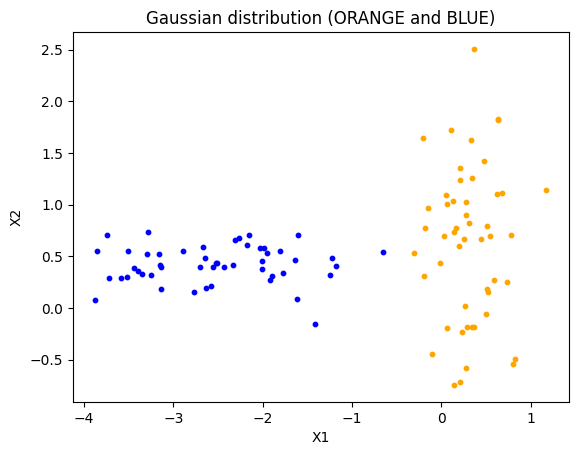

In [200]:
def double_plot(orange, blue):
    global s
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Gaussian distribution (ORANGE and BLUE)")
    plt.scatter(orange.loc[:, 0], orange.loc[:, 1], color = 'orange', s = sz)
    plt.scatter(blue.loc[:, 0], blue.loc[:, 1], color = 'blue', s = sz)
    plt.show()

    
double_plot(orange, blue)


Finally, we will step by step increase the number of points created in order to see how the distribution sampling changes gets more precise. 

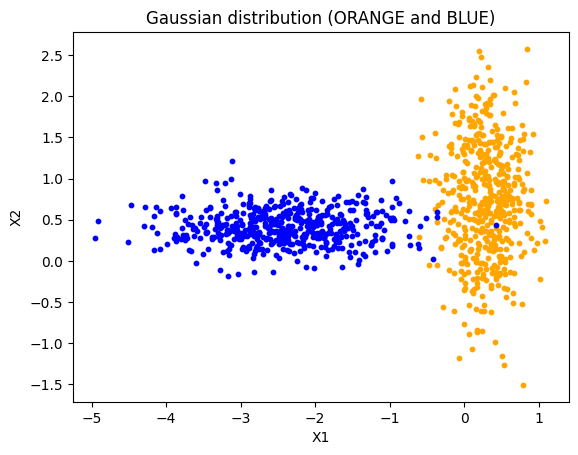

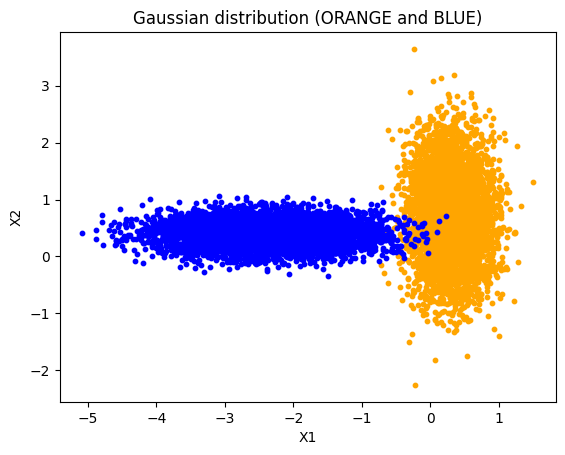

In [201]:
for i in range(2):
    N = N * 10
    main()
    double_plot(orange, blue)

1) Naive Bayes decision boundary

In [202]:

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

[1. 1. 0. ... 1. 1. 0.]


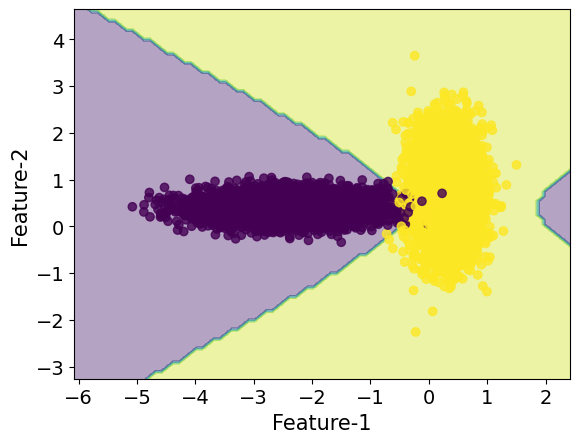

In [203]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split
#Import metrics class from sklearn
from sklearn import metrics


# Initializing Classifier
clf5 = GaussianNB()

size_or = np.size(orange, 0)
size_bl = np.size(orange, 0)
orange['class'] = np.ones(size_or) #orange class = 1
blue['class'] = np.zeros(size_bl) #blue class = 0

df = pd.concat([orange, blue])
df.describe()
df = df.sample(np.size(df, 0))
df.head()

X = df.loc[:, [0, 1]]
y = df.loc[:, 'class']

test_sz = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_sz, random_state=20)
#keeping 80% as training data and 20% as testing data.
 
#Calling the Class
naive_bayes = GaussianNB()
 
#Fitting the data to the classifier
naive_bayes.fit(X_train , y_train)

#Predict on test data
y_predicted = naive_bayes.predict(X_test)
print(y_predicted)
 
metrics.accuracy_score(y_predicted , y_test)


plt.figure()
plt.title("NB decision boundary", fontsize = 16)
plot_decision_boundaries(X_train, y_train, GaussianNB)
plt.show()



2) a) k = 15

In [204]:
global k
k = 15
N = 2 * 100
main()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

test_sz = 0.2

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = test_sz, random_state=42)

knn = KNeighborsClassifier(n_neighbors = k)
  
# print(df.head())
# print(X.head())
# print(y.head())

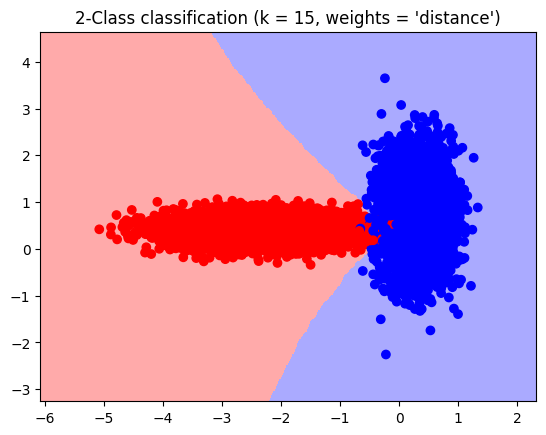

In [205]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = k

# print(X)
# print(y)
X = X_train
y = y_train

margin = 0.25
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.loc[:, 0].min() - 1, X.loc[:, 0].max() + 1
    y_min, y_max = X.loc[:, 1].min() - 1, X.loc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X.loc[:, 0], X.loc[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

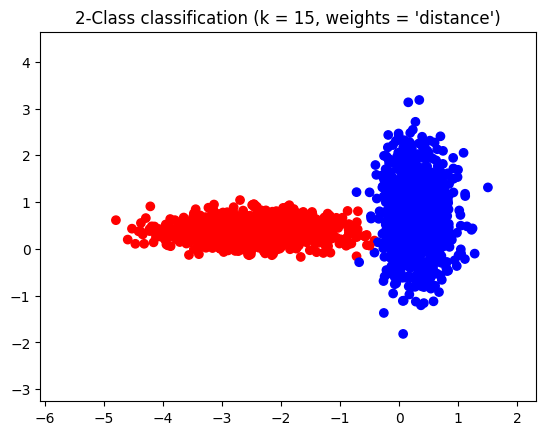

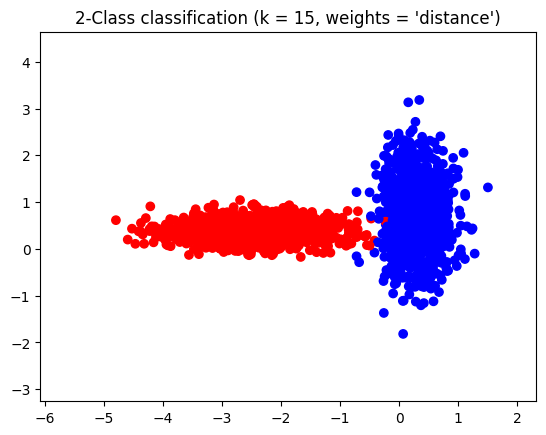

1.0


In [206]:
X = X_test
y = clf.predict(X)
res_a = y
for i in range(2):
# Plot the testing points
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(X.loc[:, 0], X.loc[:, 1], c=y, cmap=cmap_bold)
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.show()
    y = y_test
    
accu = 0
length = len(res_a)
y_test = y_test.ravel()
for i in range(length):
    if res_a[i] == y_test[i]:
        accu += 1
accuracy_a = round(accu / length, 2)
print(accuracy_a)
# print(res_a)
# print(y_test)

2) b) Using the linear model

[0.31111493 0.04919602]
                 0
count  2000.000000
mean      0.516000
std       0.457642
min      -0.668512
25%       0.097441
50%       0.749612
75%       0.922825
max       1.325962
0    0.749612
dtype: float64


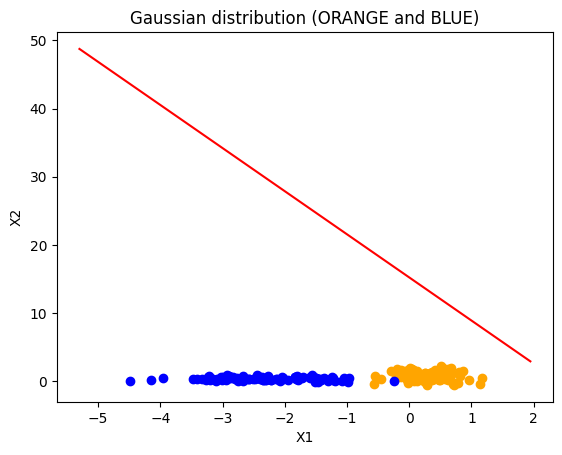

In [207]:
from sklearn import linear_model
model = linear_model.LinearRegression()
iter = 100.0

model.fit(X, y)
weights = model.coef_
print(weights)
predictions = model.predict(X)
predictions = pd.DataFrame(predictions)
print(predictions.describe())
boundary = predictions.median()
print(boundary)

X_min = X.loc[:, 0].min()
X_max = X.loc[:, 0].max()
boundary_y = []
boundary_x = np.arange(X_min - 0.5, X_max + 0.5, (X_max + 0.5 - X_min - 0.5) / iter)

for i in range(len(boundary_x)):
    boundary_y.append(boundary / weights[1] - weights[0] / weights[1] * boundary_x[i])

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Gaussian distribution (ORANGE and BLUE)")
plt.scatter(orange.loc[:, 0], orange.loc[:, 1], color = 'orange')
plt.scatter(blue.loc[:, 0], blue.loc[:, 1], color = 'blue')
plt.plot(boundary_x, boundary_y, 'red')
plt.show()



3)

In [208]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

N = 200
k = 1

# for i in range(N):
#     k += 1
#     main()
#     double_plot(orange, blue)
    


# Create feature and target arrays
X = df.drop('class', axis = 1)

y = df.loc[:, 'class']

test_sz = 0.2

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = test_sz, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

# Predict on dataset which model has not seen before
print(knn.predict(X_test))

# Calculate the accuracy of the model
print(knn.score(X_test, y_test))



[0. 1. 1. ... 1. 1. 1.]
0.9965


K = [0:200]

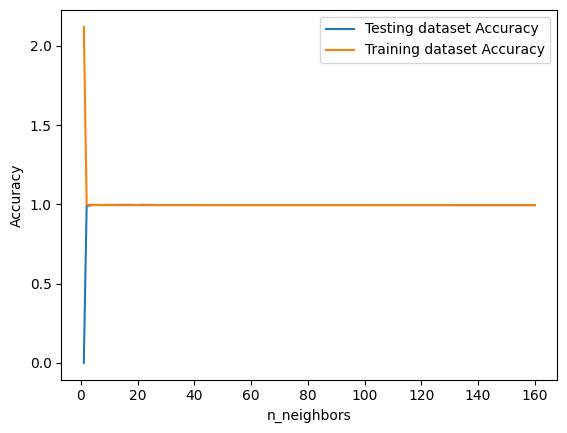

In [209]:
neighbors = np.array(range(1, int((N * (1 - test_sz)))))
train_accuracy = np.empty(len(neighbors) + 1)
test_accuracy = np.empty(len(neighbors) + 1)
  
# Loop K times
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[k] = knn.score(X_train, y_train)
    test_accuracy[k] = knn.score(X_test, y_test)
  
# Generate plot
length = len(test_accuracy)
plt.plot(range(length) + np.ones(length), test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(range(length) + np.ones(length), train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()